In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest
#sys.path.append('C:\\Users\\brittany\\henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f
#sys.path.append('C:\\Users\\Lindsey\\Documents\\GitHub\\WhenMutationsDontMatter\\')
#import plot_utils as p


import cptac
import cptac.utils as u

In [2]:
df = pd.read_csv('pancan_EGFR_other.csv')
df = df.drop(['Unnamed: 0'], axis=1)
filtered_data = df[df["Comparison"]== "HBB"]
filtered_data

,Comparison,Slope_Gbm,R_squared_gbm,P_value_Gbm,Slope_kidney,R_squared_kidney,P_value_kidney,Slope_Endo,R_squared_Endo,P_value_Endo,...,P_value_Ovar,Slope_Brca,R_squared_Brca,P_value_Brca,Slope_Luad,R_squared_Luad,P_value_Luad,Slope_hnscc,R_squared_hnscc,P_value_hnscc
9459,HBB,0.075558,0.007389,0.374141,1.154405,0.395013,1.013227e-22,0.207023,0.008831,0.262559,...,0.002174,0.331876,0.040847,0.030306,-0.356884,0.02417,0.023242,-110.581537,0.032058,0.011822


In [3]:
df_slope = df.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]]
df_slope = df_slope.dropna(thresh = 6)
df_slope

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc
0,PHLDA1,0.536872,0.189696,0.304536,0.840646,0.363866,0.230993,0.018865
2,GPRIN3,-0.196871,-0.032602,0.168797,0.131152,-0.063316,-0.136217,-0.002017
3,NFIA,0.234934,0.241707,0.052400,0.418724,-0.093636,NaN,-0.006417
5,ARMT1,-0.102381,-0.155257,-0.041317,-0.182292,-0.659200,-0.060127,-0.000282
6,PI4K2A,-0.125771,0.008335,0.251862,0.019957,0.073559,-0.009201,-0.028242
...,...,...,...,...,...,...,...,...
16731,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.088169,-0.060123
16732,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.088169,-0.060123
16733,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.088169,-0.060123
16734,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.088169,-0.060123


In [4]:
df_slope["SD"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].std(axis = 1))


In [5]:
df_slope.nlargest(10, 'SD')

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,SD
9459,HBB,0.075558,1.154405,0.207023,0.987337,0.331876,-0.356884,-110.581537,41.950281
9606,HBA2,0.073966,1.299613,0.231100,NaN,NaN,-0.377419,-83.641773,37.547989
11374,ALB,0.044701,0.157925,0.349001,1.203710,0.207499,-0.275445,-65.110214,24.719831
5335,CDC42EP5,-0.055245,-0.214500,-0.000916,0.553617,0.358084,-0.191906,-32.124525,12.173556
12267,RASIP1,-0.006662,0.346057,0.047554,0.554209,0.103668,-0.303463,-29.066832,11.036257
5422,CGNL1,0.038186,-0.987844,0.247625,0.769804,-0.001498,-0.199175,-25.529933,9.655442
11188,ACTA1,0.039441,0.128715,-0.426516,0.282924,1.132265,-0.072591,-11.919239,4.598271
3242,ARL8B,-0.059023,-0.225582,0.206456,-0.070935,0.094341,-0.086098,-11.404170,4.303727
10119,KRT6A,-0.283370,0.412033,0.010842,0.746924,1.192890,-0.042809,10.941903,4.039295
1136,BORCS8,-0.062990,0.250342,-0.119758,0.186098,0.074793,-0.132173,-8.999129,3.416944


In [6]:
df_slope["mean"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].mean(axis = 1))
df_slope["median"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].median(axis = 1))
df_slope

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,SD,mean,median
0,PHLDA1,0.536872,0.189696,0.304536,0.840646,0.363866,0.230993,0.018865,0.266847,0.355068,0.304536
2,GPRIN3,-0.196871,-0.032602,0.168797,0.131152,-0.063316,-0.136217,-0.002017,0.132683,-0.018725,-0.032602
3,NFIA,0.234934,0.241707,0.052400,0.418724,-0.093636,NaN,-0.006417,0.190122,0.141286,0.143667
5,ARMT1,-0.102381,-0.155257,-0.041317,-0.182292,-0.659200,-0.060127,-0.000282,0.224231,-0.171551,-0.102381
6,PI4K2A,-0.125771,0.008335,0.251862,0.019957,0.073559,-0.009201,-0.028242,0.116067,0.027214,0.008335
...,...,...,...,...,...,...,...,...,...,...,...
16731,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.088169,-0.060123,0.421519,0.273650,0.088169
16732,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.088169,-0.060123,0.421519,0.273650,0.088169
16733,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.088169,-0.060123,0.421519,0.273650,0.088169
16734,SCEL,NaN,NaN,0.015709,0.975582,0.348912,0.088169,-0.060123,0.421519,0.273650,0.088169


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c5def98>]],
      dtype=object)

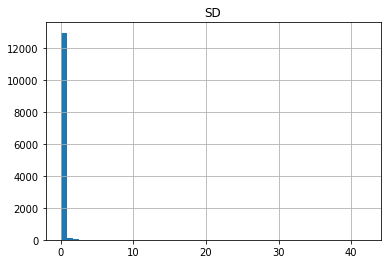

In [7]:
df_slope.hist(column='SD', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1db8e8d0>]],
      dtype=object)

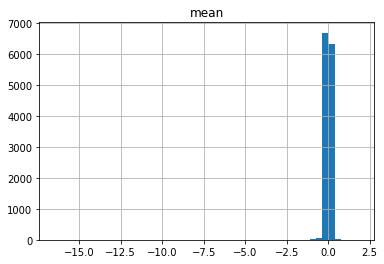

In [8]:
df_slope.hist(column='mean', bins = 50)

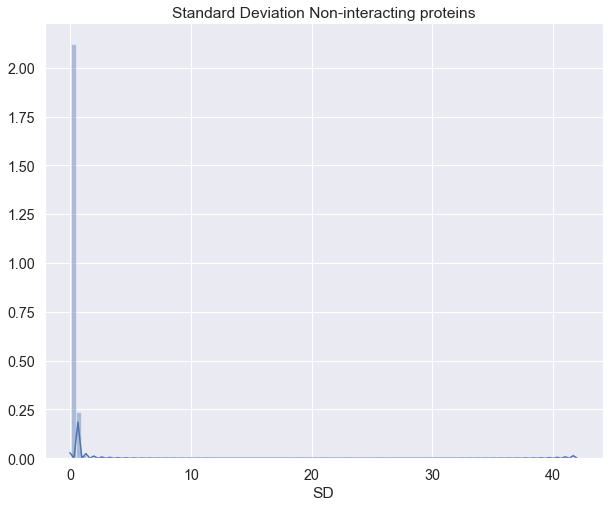

In [13]:
plt.rcParams["figure.figsize"] = (10,8)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["SD"], bins = 100).set_title('Standard Deviation Non-interacting proteins')

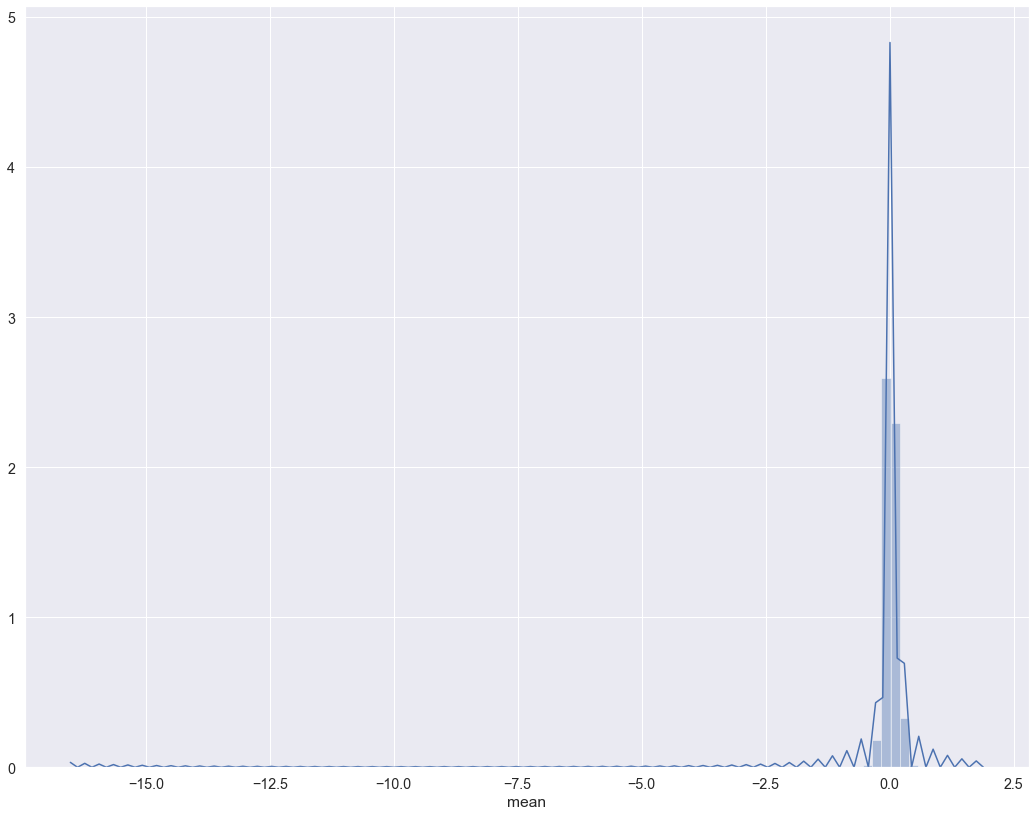

In [10]:
plt.rcParams["figure.figsize"] = (18,14)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["mean"], bins = 100)